# Sistema di Face Detection per una fotocamera digitale

##### Contesto del Progetto

La ProCam S.p.A. è pronta a lanciare una nuova fotocamera digitale compatta, accessibile e pensata per i giovani appassionati di fotografia. L'obiettivo principale del prodotto è facilitare l'esperienza di scatto, in particolare per i selfie con una o più persone.

##### Sfida

Sei stato assunto come Data Scientist per sviluppare un sistema di rilevamento volti nelle immagini, che aiuterà i tecnici a ottimizzare automaticamente le impostazioni della fotocamera durante i selfie. Il tuo compito è realizzare una pipeline che identifichi i volti presenti nelle immagini e restituisca le coordinate dei bounding box dove i volti sono individuati. Se non ci sono volti, la pipeline restituirà una lista vuota.

Si tratta di un problema di Computer Vision, più precisamente di Face Detection.
Requisiti del Progetto

- **Obiettivo**: Costruire un sistema di rilevamento dei volti utilizzando Scikit-learn. La pipeline deve essere in grado di:
    Prendere un’immagine in ingresso.
    Restituire una lista di coordinate dei bounding box dove sono presenti volti.
    Restituire una lista vuota se nell’immagine non ci sono volti.

- **Limitazioni**:
    Dataset: Non ti viene fornito un dataset. Devi cercare un dataset adatto in rete o, in mancanza di alternative, costruirlo tu stesso.
    Modelli pre-addestrati: Non è consentito utilizzare modelli pre-addestrati. Il modello di Face Detection dovrà essere addestrato da zero con Scikit-learn.
    Risorse di calcolo: Lavorerai su un sistema con capacità di calcolo limitate. Il modello dovrà essere ottimizzato per utilizzare poche risorse.

- **Documentazione**: La soluzione deve essere ben documentata. Ogni decisione adottata (scelta degli algoritmi, preprocessamento, tecniche di ottimizzazione) dovrà essere spiegata. Inoltre, ogni risorsa esterna utilizzata (paper accademici, articoli di blog, codice GitHub) dovrà essere citata.

- **Ricerca bibliografica**: Poiché non ti vengono fornite indicazioni dettagliate sull'implementazione, è essenziale condurre un'approfondita ricerca bibliografica per identificare le soluzioni migliori. Dovrai analizzare approcci già esistenti e adattarli alle limitazioni del progetto.

##### Supporto

Il progetto è complesso e richiede competenze avanzate in Computer Vision e Machine Learning. Se dovessi incontrare difficoltà durante lo sviluppo, potrai sempre contare sul supporto dei tuoi coach nella Classe Virtuale di Machine Learning su Discord.

##### Conclusione

La realizzazione di un sistema di rilevamento volti con risorse limitate e senza dataset preconfezionato è una sfida che richiede una forte capacità di problem-solving e adattamento. Una pipeline ben ottimizzata e documentata non solo contribuirà al successo del lancio del prodotto ProCam, ma rappresenterà anche un passo significativo nella tua crescita professionale come Data Scientist.


## Dataset from Kaggle

Uitlizziamo questo dataset: nonface and face dataset: https://www.kaggle.com/datasets/sagarkarar/nonface-and-face-dataset/data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sagarkarar/nonface-and-face-dataset")
# path = kagglehub.dataset_download("ashwingupta3012/human-faces")

print("Path to dataset files:", path)

100%|██████████| 836M/836M [00:06<00:00, 142MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sagarkarar/nonface-and-face-dataset/versions/1


In [ ]:
#collect image from a folder
import os
from pathlib import Path

# List all files in the directory
folder_name =  os.listdir(path)
print(folder_name)
folder_path = os.path.join(path, folder_name[0])
print(folder_path)


['Dataset']
/root/.cache/kagglehub/datasets/sagarkarar/nonface-and-face-dataset/versions/1/Dataset


Dataset with 2648 images
The image shown is (128, 128, 3)


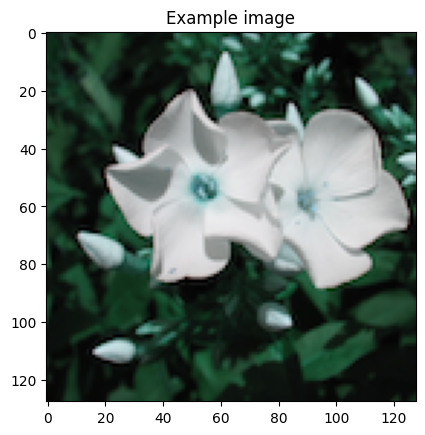

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Creating a dataset of image
images_dataset = []
labels = []

#Get all images from the folder
folder_path = Path(folder_path)
images_list = sorted([str(f) for f in folder_path.iterdir() if f.is_file() and f.suffix == '.jpg' or f.suffix == '.png' or f.suffix == '.bmp'])
images_names_list = sorted([str(f.name) for f in folder_path.iterdir() if f.is_file() and f.suffix == '.jpg' or f.suffix == '.png' or f.suffix == '.bmp'])

for image_path in images_list:
    image = cv2.imread(image_path)
    if image is None:
            print("Error loading image")
            break
    images_dataset.append(image)
    if "Human" in image_path:
        labels.append("human")
    else:
        labels.append("others")

print(f"Dataset with {len(images_dataset)} images")
print(f"The image shown is {images_dataset[33].shape}")
plt.title("Example image")
plt.imshow(images_dataset[33]);

Altro esempio
(983, 685, 3)


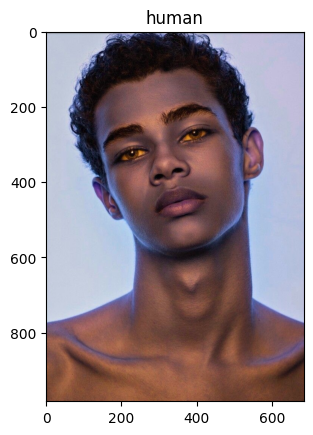

In [ ]:
print("Altro esempio")
plt.imshow(images_dataset[1550]);
plt.title(labels[1550]);
print(images_dataset[1550].shape)

In [ ]:
print(labels.count("human"),"human faces")
print(len(labels),"total images")
print(labels.count("human")*100/len(labels),"% of human images")

1331 human faces
2648 total images
50.264350453172206 % of human images


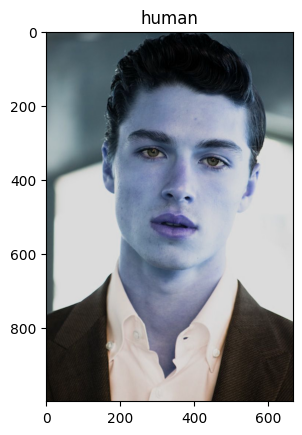

In [ ]:
import random
n=random.randint(0, len(images_dataset))
plt.imshow(images_dataset[n]);
plt.title(labels[n]);

Il dataset è composto da circa 2600 immagini la cui metà raffigura volti umani

## Face Detection Model - Ricerche Preliminari

##### 0. Soluzione vista a "lezione"

NON IMPLEMENTABILE perché usa un modello pre-addestrato

In [ ]:
# import cv2

# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# img = images_dataset[33]
# gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # plt.imshow(gray_img, cmap='gray')
# gray_img = cv2.equalizeHist(gray_img)
# faces = face_cascade.detectMultiScale(gray_img, 1.25, 5)
# if len(faces) == 0:
#     print('No face detected')
# else:
#     print("Faces detected: ", len(faces))
#     for (x, y, w, h) in faces:
#         _ = plt.imshow(cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 4))


##### 1. Face Detection using a detection cascade - **scikit-image**

https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html

DA SCARTARE perché non rispetta le specifiche del progetto: no sklean no training

In [ ]:
# # from scipy import ndimage as nd
# # from skimage import measure, color
# # from skimage.util import img_as_float
# # from PIL import Image
# import skimage as ski
# import matplotlib.pyplot as plt
# from matplotlib import patches

# # Load the trained file from the module root.
# trained_file = ski.data.lbp_frontal_face_cascade_filename()

# # Initialize the detector cascade.
# detector = ski.feature.Cascade(trained_file);

# img = ski.data.astronaut()

# detected = detector.detect_multi_scale(
#     img=img, scale_factor=1.2, step_ratio=1, min_size=(60, 60), max_size=(123, 123)
# )

# fig, ax = plt.subplots()
# ax.imshow(img, cmap='gray');

# for patch in detected:
#     ax.axes.add_patch(
#         patches.Rectangle(
#             (patch['c'], patch['r']),
#             patch['width'],
#             patch['height'],
#             fill=False,
#             color='r',
#             linewidth=2,
#         )
#     )

# plt.show()

##### 2. Building a Face Recognition System Using **Scikit Learn** in Python

https://medium.com/towards-data-science/building-a-face-recognition-system-using-scikit-learn-in-python-163fd423513b
https://github.com/V-Sher/Face-Search/blob/main/notebooks/face-search-yale.ipynb

DA SCARTARE poichè parte da un modello pre-addestrato


##### 3. Implementare il riconoscimento facciale utilizzando k-NN con **scikit-learn**

https://www.geeksforgeeks.org/ml-implement-face-recognition-using-k-nn-with-scikit-learn/

DA SCARTARE per gli stessi motivi di prima

In [ ]:
# # this one is used to recognize the
# # face after training the model with
# # our data stored using knn
# import cv2
# import numpy as np
# import pandas as pd

# from npwriter import f_name
# from sklearn.neighbors import KNeighborsClassifier


# # reading the data
# data = pd.read_csv(f_name).values

# # data partition
# X, Y = data[:, 1:-1], data[:, -1]

# print(X, Y)

# # Knn function calling with k = 5
# model = KNeighborsClassifier(n_neighbors = 5)

# # fdtraining of model
# model.fit(X, Y)

# cap = cv2.VideoCapture(0)

# classifier = cv2.CascadeClassifier("../dataset/haarcascade_frontalface_default.xml")

# f_list = []

# while True:

# 	ret, frame = cap.read()

# 	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# 	faces = classifier.detectMultiScale(gray, 1.5, 5)

# 	X_test = []

# 	# Testing data
# 	for face in faces:
# 		x, y, w, h = face
# 		im_face = gray[y:y + h, x:x + w]
# 		im_face = cv2.resize(im_face, (100, 100))
# 		X_test.append(im_face.reshape(-1))

# 	if len(faces)>0:
# 		response = model.predict(np.array(X_test))
# 		# prediction of result using knn

# 		for i, face in enumerate(faces):
# 			x, y, w, h = face

# 			# drawing a rectangle on the detected face
# 			cv2.rectangle(frame, (x, y), (x + w, y + h),
# 										(255, 0, 0), 3)

# 			# adding detected/predicted name for the face
# 			cv2.putText(frame, response[i], (x-50, y-50),
# 							cv2.FONT_HERSHEY_DUPLEX, 2,
# 										(0, 255, 0), 3)

# 	cv2.imshow("full", frame)

# 	key = cv2.waitKey(1)

# 	if key & 0xFF == ord("q") :
# 		break

# cap.release()
# cv2.destroyAllWindows()


## Face Detection Model - Design della mia soluzione

**Qualche considerazione**

Alla luce delle ricerche che son state fatte, ci son due strade percorribili:

1) costruire un classificatore di volti umani con un modello importato da sklearn (KNN, SVM, etc..) e, una volta appurato che si tratta di un volto umano, ritornare il bounding box del volto con un Cascade Classifier da cv2. Versione alternativa: riconoscere il bounding box con il Cascade e poi classificarlo.

2) Omettere il Cascade Classifier e creare un classificatore che lavora per patch all'interno dell'immagine. Quindi classificare la presenza di facce tramite patch e poi restituire la patch con probabilità di esito positivo maggiore come bounding box.

Qualche risorsa per la costruzione di un classificatore di volti umani:
- https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html
- Dalal, N. and Triggs, B., “Histograms of Oriented Gradients for Human Detection,” IEEE Computer Society Conference on Computer Vision and Pattern Recognition, 2005, San Diego, CA, USA

INNANZITUTTO serve **preprocessar**e le immagini:
- trasformazione in gray image
- padding e resize per avere una shape e una size uniforme e condivisa
- normalizzazione dei valori dell'immagine

### PREPROCESSING

In [ ]:
def find_max_image_size(image_dataset):
    max_width = 0
    max_height = 0
    shape_list = []
    for image in image_dataset:
            width, height = image.shape[0],image.shape[1]
            shape_list.append((width, height))
            if width > max_width:
                max_width = width
            if height > max_height:
                max_height = height
    return max_width, max_height,shape_list

max_width, max_height, shape_list = find_max_image_size(images_dataset)
print("Max width is:", max_width)
print("Max height is:", max_height)

Max width is: 7680
Max height is: 7680


In [ ]:
from collections import Counter
Counter(shape_list).most_common(10)

[((512, 512), 348),
 ((480, 640), 346),
 ((128, 128), 209),
 ((64, 64), 192),
 ((750, 500), 44),
 ((194, 259), 31),
 ((1104, 736), 27),
 ((981, 736), 20),
 ((640, 480), 19),
 ((900, 600), 18)]

Abbiamo immagini con diverse shape. Proviamo a combinare padding e resize

Original image shape: (128, 128, 3)
Processed image shape: (256, 256)


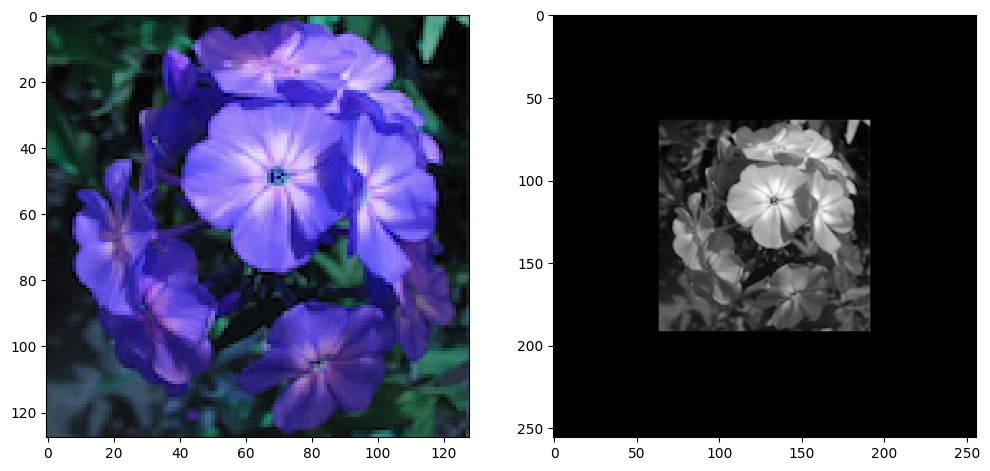

In [ ]:
def add_padding(image, target_size):
    height, width = image.shape[0],image.shape[1]
    new_height, new_width = target_size
    delta_w = new_width - width
    delta_h = new_height - height
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    new_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT)

    return new_image

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(images_dataset[0])
print("Original image shape:",images_dataset[0].shape)
plt.subplot(1,2,2)
gray_img = cv2.cvtColor(images_dataset[0], cv2.COLOR_BGR2GRAY)
new_image_padding = add_padding(gray_img, (256,256))
plt.imshow(new_image_padding, cmap="gray")
print("Processed image shape:",new_image_padding.shape)

Mettendo tutto insieme in una funzione di preprocessing...

Input image shape: (476, 385, 3)
Output image shape: (512, 512)


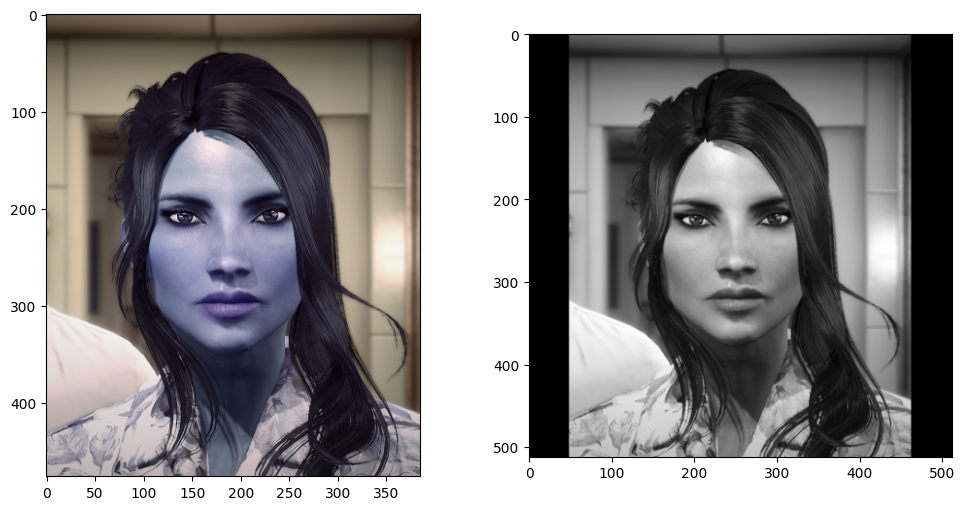

In [ ]:
def image_processing(image, output_size):
    #To gray image
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # print("gray img shape",gray_img.shape)
    #Padding for rectangular image
    if gray_img.shape[0] != gray_img.shape[1]:
        max_shape = np.max(gray_img.shape)
        targer_size = (max_shape,max_shape)
        # print("target size",targer_size)
        gray_img = add_padding(gray_img, targer_size)
    # print("padding", gray_img.shape)
    #Reshape for every image
    reshaped_img = cv2.resize(gray_img, output_size)
    # print(reshaped_img.shape)
    return reshaped_img /255

n = random.randint(0,len(images_dataset))
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(images_dataset[n])
print("Input image shape:",images_dataset[n].shape)
plt.subplot(1,2,2)
proc_img = image_processing(images_dataset[n], (512,512))
plt.imshow(proc_img, cmap="gray")
print("Output image shape:", proc_img.shape)



In [ ]:
new_images_dataset = []

for image in images_dataset:
    new_images_dataset.append(image_processing(image, (256,256))) #(512,512)

print("original imageset", len(images_dataset))
print("processed imageset", len(new_images_dataset))


original imageset 2648
processed imageset 2648


A questo punto abbiamo terminato la fase di preprocessing delle immagini e possiamo passare al classificarore

### CLASSIFICATORE

Prendendo ispirazione dal meccanismo di base del Haar Cascade per face detection, introduciamo un ulteriore preprocessing delle immagini che aiuta nel riconoscimento delle immagini: [Histogram of Oriented Gradients](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_hog.html#id3) .

Ref: Dalal, N. and Triggs, B., “Histograms of Oriented Gradients for Human Detection,” IEEE Computer Society Conference on Computer Vision and Pattern Recognition, 2005, San Diego, CA, USA.



In [ ]:
from skimage.feature import hog

# Extract HOG features
def extract_hog_features(images):
    # i = 0
    # n_sample = len(images)
    # progress = np.round(len(images_dataset)*np.arange(0.1,1.1,0.1),0)
    hog_features = []
    for image in images:
        #gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # features, _ = hog(image, orientations=8, pixels_per_cell=(16, 16),
        #             cells_per_block=(1, 1), visualize=True)
        features = hog(image,
                       orientations=9,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(3, 3),
                       block_norm='L2-Hys', visualize=False)

        hog_features.append(features)
        # i +=1
        # if i in progress:
        #     print((i/n_sample)*100,"% of sample")#np.round(,0)
    return np.array(hog_features)

# Extract HOG features
hog_features = extract_hog_features(new_images_dataset)
# hog_features


Funzione per visualizzare le immagini hog processed

In [ ]:
# import matplotlib.pyplot as plt
# from skimage.feature import hog
# from skimage import data, exposure

# image = data.astronaut()
# print(image.shape)

# fd, hog_image = hog(
#     image,
#     orientations=9,
#     pixels_per_cell=(8, 8),
#     cells_per_block= (3, 3),
#     visualize=True,
#     channel_axis=-1#transform_sqrt=True
# )

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

# ax1.axis('off')
# ax1.imshow(image, cmap=plt.cm.gray)
# ax1.set_title('Input image')

# # Rescale histogram for better display
# hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# ax2.axis('off')
# ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
# ax2.set_title('Histogram of Oriented Gradients')
# plt.show()

Il primo classificatore che testeremo è un Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear SVM classifier
clf = LinearSVC()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9886792452830189

Classification Report:
               precision    recall  f1-score   support

       human       0.99      0.99      0.99       271
      others       0.99      0.98      0.99       259

    accuracy                           0.99       530
   macro avg       0.99      0.99      0.99       530
weighted avg       0.99      0.99      0.99       530



### TESTING

TESTIAMO questo primo prototipo visualizzando le immagini e la loro predizione

In [ ]:
img_train, img_test, _, _ = train_test_split(new_images_dataset, labels, test_size=0.2, random_state=42)

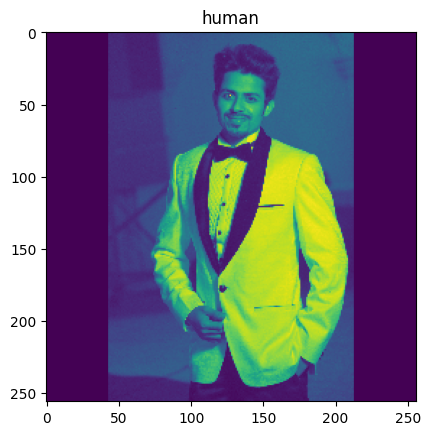

In [ ]:
import random
n=random.randint(0, len(y_pred))

plt.imshow(img_test[n]);
plt.title(y_pred[n]);

In [ ]:
wrong_prediction = np.where(y_pred != y_test)[0]
wrong_prediction

array([ 66, 174, 245, 269, 480, 514])

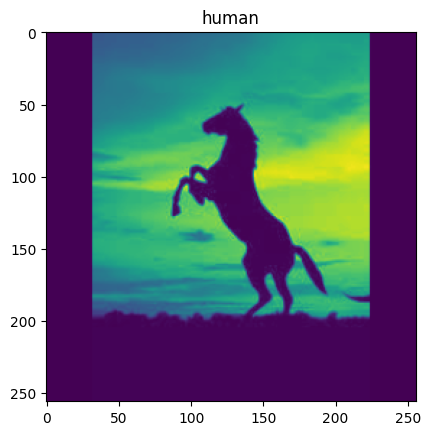

In [ ]:
import random
k=random.randint(0, len(wrong_prediction)-1)
n=wrong_prediction[k]

plt.imshow(img_test[n]);
plt.title(y_pred[n]);

Altri TEST su NUOVE IMMAGINI

In [ ]:
def hog_extraction(image):
    features = hog(image,
                       orientations=9,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(3, 3),
                       block_norm='L2-Hys', visualize=False)
    hog_features = np.array(features)
    return np.reshape(hog_features,(1,len(hog_features)))

(1000, 946, 3)
predict_proba: [-1.20756838]


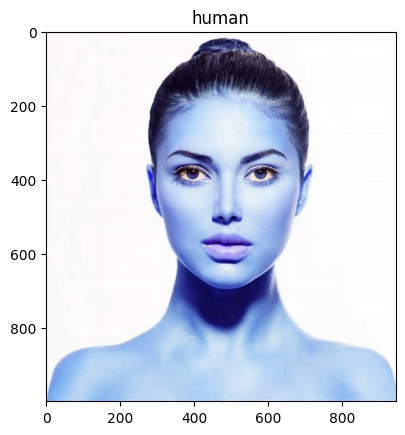

In [ ]:
new_img = cv2.imread("face.jpg")
print(new_img.shape)

img_preproc = image_processing(new_img, (256,256))
hog_features = hog_extraction(img_preproc)
hog_features_std = scaler.transform(hog_features)
face_detection = clf.predict(hog_features_std)
face_detection_proba = clf.decision_function(hog_features_std)
print("predict_proba:", face_detection_proba)

plt.imshow(new_img);
plt.title(face_detection[0]);

(64, 64, 3)
predict_proba: [0.40978558]


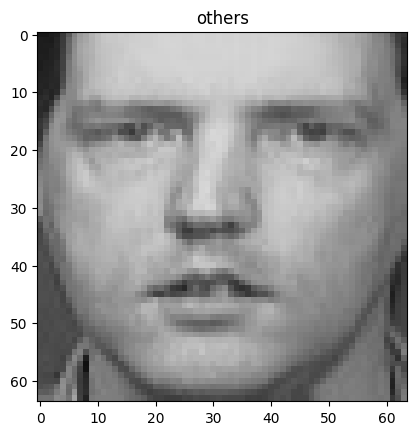

In [ ]:
new_img = cv2.imread("olivetti_face.jpg")
print(new_img.shape)

img_preproc = image_processing(new_img, (256,256))
hog_features = hog_extraction(img_preproc)
hog_features_std = scaler.transform(hog_features)
face_detection = clf.predict(hog_features_std)
face_detection_proba = clf.decision_function(hog_features_std)
print("predict_proba:", face_detection_proba)

plt.imshow(new_img);
plt.title(face_detection[0]);

Vediamo se anche haarcascade fallisce

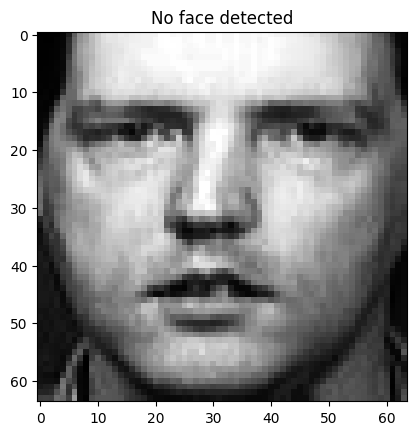

In [ ]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread("olivetti_face.jpg")

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_img, cmap='gray')
gray_img = cv2.equalizeHist(gray_img)
faces = face_cascade.detectMultiScale(gray_img, 1.25, 5)
if len(faces) == 0:
    plt.title('No face detected')
    plt.imshow(gray_img,cmap="gray")
else:
    plt.title(f"Faces detected: {len(faces)}")
    for (x, y, w, h) in faces:
        _ = plt.imshow(cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 4))

### ALTRI MODELLI E OTTIMIZZAZIONE

Per quanto riguarda il preprocessing c'è da valutare la size del resize e alcuni parametri del hog extraction. Come visto durante il design conviene utilizzare i parametri standard dell'hog (giusto compromesso tra costo e qualità) e far variare la sola size del resize


In [ ]:
resize_size = [(64,64), (128,128), (256,256)] # (512,512) servono almeno 6 GB di ram, per ora ci fermiao a 256
accuracy = []

for size in resize_size:
    print(">>>> Parameter resize_size:", size)
    # Image Preprocessing
    new_images_dataset = []
    for image in images_dataset:
        new_images_dataset.append(image_processing(image,size)) #(512,512)

    print("original imageset", len(images_dataset))
    print("processed imageset", len(new_images_dataset))

    # Extract HOG features
    def extract_hog_features(images):
        hog_features = []
        for image in images:
            features = hog(image,
                        orientations=9,
                        pixels_per_cell=(8, 8),
                        cells_per_block=(3, 3),
                        block_norm='L2-Hys', visualize=False)
            hog_features.append(features)
        return np.array(hog_features)

    hog_features = extract_hog_features(new_images_dataset)
    print("hog extraction completed with n. features:", hog_features.shape)


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train a linear SVM classifier
    clf = LinearSVC()
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the classifier
    accuracy.append(accuracy_score(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("---------------------------\n\n")
    # print("\nClassification Report:\n", classification_report(y_test, y_pred))


>>>> Parameter resize_size: (64, 64)
original imageset 2648
processed imageset 2648
hog extraction completed with n. features: (2648, 2916)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.969811320754717
---------------------------


>>>> Parameter resize_size: (128, 128)
original imageset 2648
processed imageset 2648
hog extraction completed with n. features: (2648, 15876)
Accuracy: 0.9811320754716981
---------------------------


>>>> Parameter resize_size: (256, 256)
original imageset 2648
processed imageset 2648
hog extraction completed with n. features: (2648, 72900)
Accuracy: 0.9886792452830189
---------------------------




Ottimizzazione dei parametri del preprocessing terminata:
- resize_size (256,256) che potrebbe anche aumentare a 512,512 con le giuste risorse di calcolo
- hog_extractore vanno benissimo i parametri di default

Volendo potremmo graficare il tramite CURVA DI VALIDAZIONE

In [ ]:
# from sklearn.model_selection import validation_curve #cross_val_score, learning_curve,

# def plot_validation_curve(estimator, X, y, param_range, param_name, cv=10):
#     """Validation curve plot: shows accuracy values for different values of a select parameters.

#     --Params
#      - estimator: a scikit-learn estimator,
#      - X, y: numpy ndarrays
#      - param_range: List, the range values the paramete must explor
#      - param_name: str, the name of the parameter
#      - cv: int, the number of folds for the stratified cross validation
#      """

#     train_score, test_score = validation_curve(
#         estimator=estimator,
#         X=X,
#         y=y,
#         param_range=param_range,
#         param_name=param_name,
#         cv=cv
#     )

#     train_avg, train_std = np.mean(train_score, axis=1), np.std(train_score, axis=1)
#     test_avg, test_std = np.mean(test_score, axis=1), np.std(test_score, axis=1)

#     plt.plot(param_range, train_avg, color='blue', marker='o', markersize=5, label='Training Accuracy')
#     plt.fill_between(param_range, train_avg + train_std, train_avg - train_std, alpha=.15, color='blue')
#     plt.plot(param_range, test_avg, color='green', marker='s', markersize=5, linestyle='--', label='Validation Accuracy')
#     plt.fill_between(param_range, test_avg + test_std, test_avg - test_std, alpha=.15, color='green')
#     plt.legend()
#     plt.grid()
#     plt.xlabel(f"Parameter {param_name.split('__')[-1]}")
#     plt.ylabel('Accuracy')
#     plt.ylim([0.8, 1.0])
#     plt.xscale('log')
#     plt.show()

# pipe_lr = make_pipeline(
#     StandardScaler(),
#     LogisticRegression(penalty='l2', max_iter=10000)
# )


# plot_validation_curve(pipe_lr, X_train, y_train, [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'logisticregression__C')

Facciamo un **FREEZE** prima di passare al confronto dei classificatori

In [ ]:
# Image Preprocessing
new_images_dataset = []
for image in images_dataset:
    new_images_dataset.append(image_processing(image,(256,256))) #(512,512)

print("original imageset", len(images_dataset))
print("processed imageset", len(new_images_dataset))

# Extract HOG features
def extract_hog_features(images):
    hog_features = []
    for image in images:
        features = hog(image,
                    orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3),
                    block_norm='L2-Hys', visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

hog_features = extract_hog_features(new_images_dataset)
print("hog extraction completed with n. features:", hog_features.shape)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)
print("Train samples:", len(X_train))
print("Test samples:", len(X_test))

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

original imageset 2648
processed imageset 2648
hog extraction completed with n. features: (2648, 72900)
Train samples: 2118
Test samples: 530


Quali modelli vogliamo confrontare?? Partiamo con
- Regressione Logistica
- SVC
- KNN

In [ ]:
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

# accuracy = []
# accuracy.append(accuracy_score(y_test, y_pred))

# Train a linear SVM classifier
print("LinearSVC")
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.decision_function(X_test)
accuracy_value = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_value)
y_test_le = [1 if item == "human" else 0 for item in y_test]
y_pred_le = [1 if item == "human" else 0 for item in y_test]
log_loss_value = log_loss(y_test_le, y_pred_le)
print("Log loss:", log_loss_value)
# y_proba_std = (y_proba - min(y_proba)) / (max(y_proba) - min(y_proba))
# auc_value = roc_auc_score(y_test_le, y_proba_std) #[:,1]
print("Auc value: absent")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("---------------------------")


LinearSVC
Accuracy: 0.9886792452830189
Log loss: 2.2204460492503136e-16
Auc value: absent

Classification Report:
               precision    recall  f1-score   support

       human       0.99      0.99      0.99       271
      others       0.99      0.98      0.99       259

    accuracy                           0.99       530
   macro avg       0.99      0.99      0.99       530
weighted avg       0.99      0.99      0.99       530



In [ ]:
# Train a linear LogReg classifier
from sklearn.linear_model import LogisticRegression

print("Logistic Regressor")
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)
accuracy_value = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_value)
y_test_le = [1 if item == "human" else 0 for item in y_test]
y_pred_le = [1 if item == "human" else 0 for item in y_test]
log_loss_value = log_loss(y_test_le, y_pred_le)
print("Log loss:", log_loss_value)
# y_proba_std = (y_proba - min(y_proba)) / (max(y_proba) - min(y_proba))
auc_value = roc_auc_score(y_test_le, y_proba[:,0])
print("Auc value:", auc_value)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("---------------------------")


Logistic Regressor
Accuracy: 0.9867924528301887
Log loss: 2.2204460492503136e-16
Auc value: 0.9992733904173019

Classification Report:
               precision    recall  f1-score   support

       human       0.99      0.99      0.99       271
      others       0.99      0.98      0.99       259

    accuracy                           0.99       530
   macro avg       0.99      0.99      0.99       530
weighted avg       0.99      0.99      0.99       530



In [ ]:
# Train a kNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier

print("KNN Classifier")
Ks = [1,2,3,5,10,15,20] #4,5,7,10,12,15,20,30,40,50

for K in Ks:

    print("K="+str(K))
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)
    y_prob_train = knn.predict_proba(X_train)

    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)

    loss_train = log_loss(y_train, y_prob_train)
    loss_test = log_loss(y_test, y_prob)

    print("Accuracy: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
    print("Log loss: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))



KNN Classifier
K=1
Accuracy: TRAIN=1.0000 TEST=0.9604
Log loss: TRAIN=0.0000 TEST=1.4281
K=2
Accuracy: TRAIN=0.9703 TEST=0.9396
Log loss: TRAIN=0.0304 TEST=1.2594
K=3
Accuracy: TRAIN=0.9698 TEST=0.9434
Log loss: TRAIN=0.0548 TEST=1.1416
K=5
Accuracy: TRAIN=0.9580 TEST=0.9396
Log loss: TRAIN=0.0888 TEST=0.8400
K=10
Accuracy: TRAIN=0.9363 TEST=0.9302
Log loss: TRAIN=0.1294 TEST=0.4763
K=15
Accuracy: TRAIN=0.9344 TEST=0.9340
Log loss: TRAIN=0.1512 TEST=0.4693
K=20
Accuracy: TRAIN=0.9282 TEST=0.9321
Log loss: TRAIN=0.1627 TEST=0.4129


Sembra essere un problema risolvibile con regressione logistica o svm lineare. Possiamo provare ad ottimizzare questi modelli. Quindi utilizzeremo:
- Linear SVC: random search e ottimizzazione del parametro C
- Logistic Regression: random search con SDGclassifier + hinge loss e ottimizzazione di alpha, lr, eta e max iter

Attenzione ai problemi di memoria

CROSS-VALIDATION

In [ ]:
from sklearn.model_selection import StratifiedKFold

y_train_array = np.array(y_train)
KFold = StratifiedKFold(n_splits=10).split(X_train, y_train_array)
clf = LinearSVC()

scores = []

for k, (train, test) in enumerate(KFold):
    clf.fit(X_train[train], y_train_array[train])
    y_pred_array = clf.predict(X_train[test])
    scores.append(accuracy_score(y_train_array[test], y_pred_array))
    print(
        f'Fold {k+1:02} '
        # f'Class distr {np.bincount(y_train_array[train])} '
        f'with CV score: {scores[-1]:.3f}')

print(f'CV accuracy averaged: {np.mean(scores):.3f} +/- {np.std(scores):.3f}')

Fold 01 with CV score: 0.972
Fold 02 with CV score: 0.981
Fold 03 with CV score: 0.976
Fold 04 with CV score: 0.962
Fold 05 with CV score: 0.976
Fold 06 with CV score: 0.972
Fold 07 with CV score: 0.972
Fold 08 with CV score: 0.972
Fold 09 with CV score: 0.986
Fold 10 with CV score: 0.976
CV accuracy averaged: 0.975 +/- 0.006


RANDOM SEARCH

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
# import scipy.stats

# Creazione della pipeline con normalizzazione
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(dual=False, max_iter=5000))
])
        # pipe_svc = make_pipeline(
        #     #StandardScaler(),
        #     SVC(random_state=1)
        # )

# Definizione dello spazio degli iperparametri
param_dist = {
    "svm__C": loguniform(1e-4, 1e2),  # C con distribuzione logaritmica tra 0.0001 e 100
    #"svm__tol": loguniform(1e-5, 1e-2),  # Tolleranza per la convergenza
    "svm__penalty": ["l2"]  # Solo L2 supportato con dual=False
}
        # param_range = scipy.stats.loguniform(0.0001, 1000.0)
        # param_range.rvs(10)
        # param_grid = [
        #     {"svc__C": param_range,
        #     "svc__kernel": ["linear"]}
        # ]

# Randomized Search con cross-validation
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist,
    n_iter=20, cv=10, scoring="accuracy", n_jobs=-1, random_state=42
)
        # rs = RandomizedSearchCV(
        #     estimator=pipe_svc,
        #     param_distributions=param_grid, # note the *ditributions part
        #     scoring='accuracy',
        #     refit=True,
        #     n_iter=20,
        #     cv=10,
        #     random_state=1,
        #     n_jobs=-1
        # )

# Training
random_search.fit(X_train, y_train)
# Migliori parametri trovati
print("Migliori parametri:", random_search.best_params_)
print("Miglior accuratezza:", random_search.best_score_)
        # _ = rs.fit(X_train, y_train)
        # rs.best_score_
        # rs.best_params_


Migliori parametri: {'svm__C': 0.0012601639723276807, 'svm__penalty': 'l2'}
Miglior accuratezza: 0.9749843512474291


In [ ]:
clf_SVC_optimized = random_search.best_estimator_
_ = clf_SVC_optimized.fit(X_train, y_train)
print(f'Test accuracy training: {clf_SVC_optimized.score(X_train, y_train):.3f}')
print(f'Test accuracy testing: {clf_SVC_optimized.score(X_test, y_test):.3f}')

Test accuracy training: 1.000
Test accuracy testing: 0.987


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Creazione della pipeline con normalizzazione
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDClassifier(loss="hinge", early_stopping=True, random_state=42))
])

# Definizione dello spazio degli iperparametri
param_dist = {
    "sgd__alpha": loguniform(1e-6, 1e-1),  # Regolarizzazione (simile a 1/C)
    "sgd__learning_rate": ["optimal", "invscaling", "constant"],  # Strategie di learning rate
    "sgd__eta0": loguniform(1e-4, 1e-1),  # Valore iniziale del learning rate
    "sgd__max_iter": [1000, 3000, 5000],  # Numero massimo di iterazioni
}

# Randomized Search con cross-validation
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist,
    n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, random_state=42
)

# Training
random_search.fit(X_train, y_train)

# Migliori parametri trovati
print("Migliori parametri:", random_search.best_params_)
print("Miglior accuratezza:", random_search.best_score_)


Migliori parametri: {'sgd__alpha': 7.459343285726558e-05, 'sgd__eta0': 0.07114476009343425, 'sgd__learning_rate': 'constant', 'sgd__max_iter': 1000}
Miglior accuratezza: 0.9669565993130828


In [ ]:
clf_SDG_optimized = random_search.best_estimator_
_ = clf_SDG_optimized.fit(X_train, y_train)
print(f'Test accuracy training: {clf_SDG_optimized.score(X_train, y_train):.3f}')
print(f'Test accuracy testing: {clf_SDG_optimized.score(X_test, y_test):.3f}')

Test accuracy training: 0.997
Test accuracy testing: 0.981


In [ ]:
clf = LinearSVC(C=0.01, max_iter=2000)
clf.fit(X_train, y_train)
print(f'Test accuracy training: {clf.score(X_train, y_train):.3f}')
print(f'Test accuracy testing: {clf.score(X_test, y_test):.3f}')

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test accuracy training: 1.000
Test accuracy testing: 0.989


In [ ]:
import joblib

# Save the trained model
joblib.dump(clf, "face_detector_model_SVC.pkl")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
joblib.dump(scaler, "face_scaler.pkl")
print("Model saved successfully!")

Model saved successfully!


## Gestione della BOUNDING BOX

In [ ]:
# Load the saved model
clf = joblib.load("face_detector_model_SVC.pkl")

print("Model loaded!")


Model loaded!


### VERSIONE BASE - Combino il mio modello con l'haarcascade per trovare il bounding box

In [ ]:
def detect_faces(image):

    img_preproc = image_processing(image, (256,256))
    hog_features = hog_extraction(img_preproc)
    hog_features_std = scaler.transform(hog_features)
    face_detection = clf.predict(hog_features_std)
    face_detection_proba = clf.decision_function(hog_features_std)
    print("predict_proba:", face_detection_proba)

    plt.imshow(image);
    plt.title(face_detection[0]);

    if face_detection[0]=="human":
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_image, 1.1, 4)
        for (x, y, w, h) in faces:
            _ = plt.imshow(cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 255), 4))

    return

predict_proba: [-1.20725352]


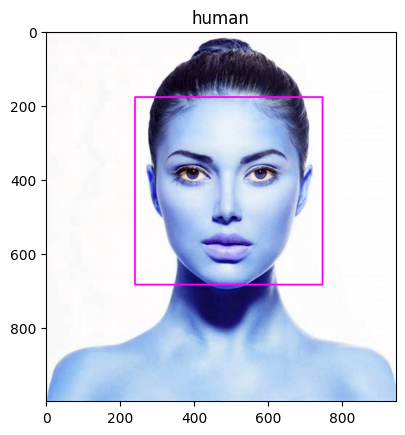

In [ ]:
img = cv2.imread("face.jpg")
detect_faces(img)

### VERSIONE DETECTION TRAMITE PATCH

SISTEMA DI PATCH CENTRATE: Ipotesi selfie

In [ ]:
def detect_faces_patch_centered(image):

    face_detected = "human"
    patch_with_faces = []
    iteration = 0
    stride = int(np.min([image.shape[0],image.shape[1]])*0.1)
    h_crop = stride
    w_crop = stride

    while face_detected == "human" and iteration < 3:

        img_preproc = image_processing(image, (256,256))
        hog_features = hog_extraction(img_preproc)
        hog_features_std = scaler.transform(hog_features)
        face_prediction = clf.predict(hog_features_std)
        face_detected = face_prediction[0]
        print(clf.decision_function(hog_features_std))
        if face_detected == "human":
            patch_with_faces.append(image)
            iteration += 1
            print("iterazione",iteration)
            print(image.shape)
            # h_crop = 64
            # w_crop = 64
            if iteration == 1:
                if image.shape[0] != image.shape[1]:
                    if image.shape[0] > image.shape[1]:
                        image = image[ int(image.shape[0]/2 - image.shape[1]/2 + h_crop) : int(image.shape[0]/2 + image.shape[1]/2 - h_crop) ,
                                    w_crop : image.shape[1] - w_crop]
                    elif image.shape[0] < image.shape[1]:
                        image = image[ h_crop : image.shape[0] - h_crop,
                                    int(image.shape[1]/2 - image.shape[0]/2 + w_crop) : int(image.shape[1]/2 + image.shape[0]/2 - w_crop)]
                else:
                    image = image[h_crop : image.shape[0] - h_crop,
                                w_crop : image.shape[1] - w_crop]
            else:
                image = image[h_crop : image.shape[0] - h_crop,
                                w_crop : image.shape[1] - w_crop]

            if image.shape[0] < stride or image.shape[1] < stride:
                break

    return patch_with_faces

[-1.20725352]
iterazione 1
(1000, 946, 3)
[-1.45385299]
iterazione 2
(758, 758, 3)
[-0.96416229]
iterazione 3
(570, 570, 3)
number of patches with face: 3


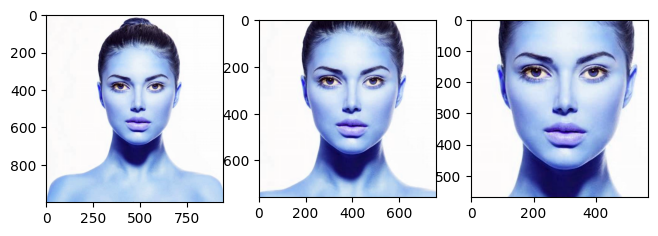

In [ ]:
img = cv2.imread("face.jpg")

patch_with_faces = detect_faces_patch_centered(img)

# plt.imshow(img);
print("number of patches with face:", len(patch_with_faces))

if len(patch_with_faces)>6:
    k=6
else:
    k = len(patch_with_faces)

plt.figure(figsize=(16,6))
for i in range(0,k):
    plt.subplot(1,6,i+1)
    if i > len(patch_with_faces):
        break
    plt.imshow(patch_with_faces[i]);


n 1707
[-1.4693608]
iterazione 1
(475, 317, 3)
[0.34962449]
number of patches with face: 1


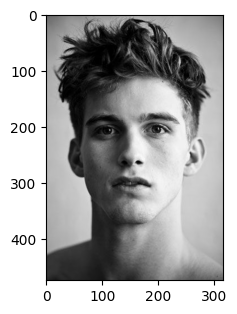

In [ ]:
n=random.randint(0, len(images_dataset))
#n = 1677
test_img = images_dataset[n]
print("n",n)

patch_with_faces = detect_faces_patch_centered(test_img)
print("number of patches with face:", len(patch_with_faces))

plt.figure(figsize=(16,6))

if len(patch_with_faces)==0:
    plt.imshow(test_img)
    k=0
elif len(patch_with_faces)>6:
    k=6
else:
    k = len(patch_with_faces)

for i in range(0,k):
    plt.subplot(1,6,i+1)
    if i > len(patch_with_faces):
        break
    plt.imshow(patch_with_faces[i]);

ED INFINE CENTERED + BOUNDING BOX

In [ ]:
def detect_faces_final(image):

    original_image = image.copy()
    face_detected = "human"
    patch_with_faces = []
    predict_proba = []
    iteration = 0
    stride = int(np.min([image.shape[0],image.shape[1]])*0.1)
    h_crop, w_crop = stride, stride
    # y_start,y_end,x_start,x_end = stride,stride,original_image.shape[0]-stride, original_image.shape[1]-stride
    y_start,y_end,x_start,x_end = 0,0,0,0

    while face_detected == "human" and iteration < 3:

        img_preproc = image_processing(image, (256,256))
        hog_features = hog_extraction(img_preproc)
        hog_features_std = scaler.transform(hog_features)
        face_prediction = clf.predict(hog_features_std)
        face_detected = face_prediction[0]
        face_prediction_proba = clf.decision_function(hog_features_std)
        if face_detected == "human":
            patch_with_faces.append(image)
            predict_proba.append(face_prediction_proba)
            print(face_prediction_proba)
            iteration += 1
            # print("iterazione",iteration)
            # print(image.shape)
            # h_crop = 64
            # w_crop = 64
            if iteration == 1:
                if image.shape[0] != image.shape[1]:
                    if image.shape[0] > image.shape[1]:
                        y_start = int(image.shape[0]/2 - image.shape[1]/2 + h_crop)
                        y_end = int(image.shape[0]/2 + image.shape[1]/2 - h_crop)
                        x_start = w_crop
                        x_end = image.shape[1] - w_crop
                        image = image[ y_start:y_end , x_start:x_end ]

                    elif image.shape[0] < image.shape[1]:
                        y_start = h_crop
                        y_end = image.shape[0] - h_crop
                        x_start = int(image.shape[1]/2 - image.shape[0]/2 + w_crop)
                        x_end = int(image.shape[1]/2 + image.shape[0]/2 - w_crop)
                        image = image[ y_start:y_end , x_start:x_end ]
                else:
                    y_start = h_crop
                    y_end = image.shape[0] - h_crop
                    x_start = w_crop
                    x_end = image.shape[1] - w_crop
                    image = image[ y_start:y_end , x_start:x_end ]
            else:
                y_start = h_crop
                y_end = image.shape[0] - h_crop
                x_start = w_crop
                x_end = image.shape[1] - w_crop
                image = image[ y_start:y_end , x_start:x_end ]

            if image.shape[0] < stride or image.shape[1] < stride:
                break


    plt.imshow(original_image)
    patch_coord_list = []
    if len(patch_with_faces) > 0:
            plt.title("Human face detected")
            if iteration == 1:
                plt.imshow(cv2.rectangle(original_image, (x_start,y_start), (x_end, y_end), (255, 0, 255), 8))
                patch_coord_list.append((x_start,y_start,x_end,y_end))
            else:
                # plt.imshow(cv2.rectangle(original_image, (x_start,y_start), (x_end, y_end), (255, 0, 255), 8))
                # plt.imshow(cv2.rectangle(original_image, (int((image.shape[1]-x_start)/2),int((image.shape[0]-y_start)/2)), (int((image.shape[1]+x_end)/2),int((image.shape[0]+y_end)/2)), (255, 0, 255), 8))
                plt.imshow(cv2.rectangle(original_image, (int(original_image.shape[1]/2-(x_end-x_start)/2),int(original_image.shape[0]/2-(y_end-y_start)/2)), (int(original_image.shape[1]/2+(x_end-x_start)/2),int(original_image.shape[0]/2+(y_end-y_start)/2)), (255, 0, 255), 8))
                patch_coord_list.append((int(original_image.shape[1]/2-(x_end-x_start)/2),int(original_image.shape[0]/2-(y_end-y_start)/2),int(original_image.shape[1]/2+(x_end-x_start)/2),int(original_image.shape[0]/2+(y_end-y_start)/2)))
    else:
        plt.title("no face")

    return patch_with_faces, patch_coord_list

[-1.20725352]
[-1.45385299]
[-0.96416229]
[(282, 309, 664, 691)]
number of patches with face: 3


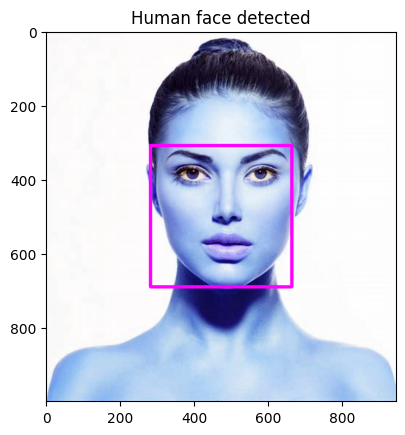

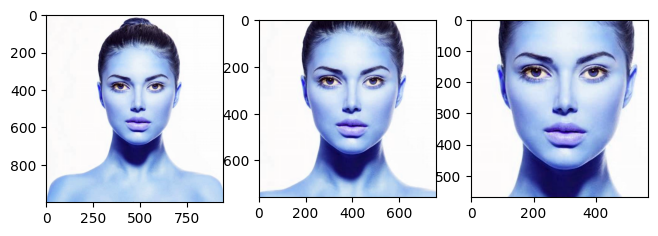

In [ ]:
img = cv2.imread("face.jpg")

patch_with_faces, patch_coord_list = detect_faces_final(img)
print(patch_coord_list)

# plt.imshow(img);
print("number of patches with face:", len(patch_with_faces))

if len(patch_with_faces)>6:
    k=6
else:
    k = len(patch_with_faces)

plt.figure(figsize=(16,6))
for i in range(0,k):
    plt.subplot(1,6,i+1)
    if i > len(patch_with_faces):
        break
    plt.imshow(patch_with_faces[i]);


n 1975
[-1.77035368]
[-0.23443106]
number of patches with face: 2


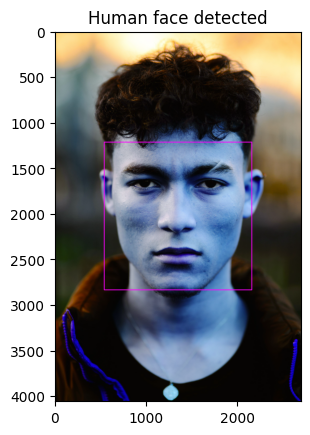

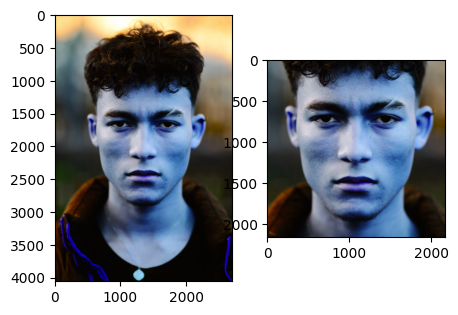

In [ ]:
n=random.randint(0, len(images_dataset))
# n=1538
test_img = images_dataset[n]
print("n",n)

patch_with_faces, patch_coord_list = detect_faces_final(test_img)
print("number of patches with face:", len(patch_with_faces))

plt.figure(figsize=(16,6))

if len(patch_with_faces)==0:
    plt.imshow(test_img)
    k=0
elif len(patch_with_faces)>6:
    k=6
else:
    k = len(patch_with_faces)

for i in range(0,k):
    plt.subplot(1,6,i+1)
    if i > len(patch_with_faces):
        break
    plt.imshow(patch_with_faces[i]);

## CONCLUSIONI

Per concludere, è stato costruito un classificatore di volti umani usando un SVC Lineare in grado di rilevare la presenza di volti umani all'interno di un immagine. Fondamentale il passaggio di estrazione delle HOG a mimare il preprocessing che avviene nell'algoritmo di Haar Cascade (stato dell'arte).

Il modello quindi è stato montato all'interno di una funzione che ispeziona l'immagine con un sistema di patch che diminuiscono di size ad ogni iterazione. In questo modo è stato possibile rispondere alla richiesta di restituzione di una bounding box e delle sue coordinate

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

import joblib
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [ ]:
def image_processing(image, output_size):
    #To gray image
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # print("gray img shape",gray_img.shape)
    #Padding for rectangular image
    if gray_img.shape[0] != gray_img.shape[1]:
        max_shape = np.max(gray_img.shape)
        targer_size = (max_shape,max_shape)
        # print("target size",targer_size)
        gray_img = add_padding(gray_img, targer_size)
    # print("padding", gray_img.shape)
    #Reshape for every image
    reshaped_img = cv2.resize(gray_img, output_size)
    # print(reshaped_img.shape)
    return reshaped_img /255


def hog_extraction(image):
    features = hog(image,
                       orientations=9,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(3, 3),
                       block_norm='L2-Hys', visualize=False)
    hog_features = np.array(features)
    return np.reshape(hog_features,(1,len(hog_features)))



In [ ]:
# Load the saved model
scaler = joblib.load("face_scaler.pkl")
clf = joblib.load("face_detector_model_SVC.pkl")

In [ ]:
def detect_faces_in_boundingBox(image):

    original_image = image.copy()
    face_detected = "human"
    patch_with_faces = []
    predict_proba = []
    iteration = 0
    stride = int(np.min([image.shape[0],image.shape[1]])*0.1)
    h_crop, w_crop = stride, stride
    y_start,y_end,x_start,x_end = 0,0,0,0

    while face_detected == "human" and iteration < 3:

        img_preproc = image_processing(image, (256,256))
        hog_features = hog_extraction(img_preproc)
        hog_features_std = scaler.transform(hog_features)
        face_prediction = clf.predict(hog_features_std)
        face_detected = face_prediction[0]
        face_prediction_proba = clf.decision_function(hog_features_std)
        if face_detected == "human":
            patch_with_faces.append(image)
            predict_proba.append(face_prediction_proba)
            iteration += 1
            if iteration == 1:
                if image.shape[0] != image.shape[1]:
                    if image.shape[0] > image.shape[1]:
                        y_start = int(image.shape[0]/2 - image.shape[1]/2 + h_crop)
                        y_end = int(image.shape[0]/2 + image.shape[1]/2 - h_crop)
                        x_start = w_crop
                        x_end = image.shape[1] - w_crop
                        image = image[ y_start:y_end , x_start:x_end ]

                    elif image.shape[0] < image.shape[1]:
                        y_start = h_crop
                        y_end = image.shape[0] - h_crop
                        x_start = int(image.shape[1]/2 - image.shape[0]/2 + w_crop)
                        x_end = int(image.shape[1]/2 + image.shape[0]/2 - w_crop)
                        image = image[ y_start:y_end , x_start:x_end ]
                else:
                    y_start = h_crop
                    y_end = image.shape[0] - h_crop
                    x_start = w_crop
                    x_end = image.shape[1] - w_crop
                    image = image[ y_start:y_end , x_start:x_end ]
            else:
                y_start = h_crop
                y_end = image.shape[0] - h_crop
                x_start = w_crop
                x_end = image.shape[1] - w_crop
                image = image[ y_start:y_end , x_start:x_end ]

            if image.shape[0] < stride or image.shape[1] < stride:
                break


    plt.imshow(original_image)
    patch_coord_list = []
    if len(patch_with_faces) > 0:
            plt.title("Human face detected")
            if iteration == 1:
                plt.imshow(cv2.rectangle(original_image, (x_start,y_start), (x_end, y_end), (255, 0, 255), 8))
                patch_coord_list.append((x_start,y_start,x_end,y_end))
            else:
                plt.imshow(cv2.rectangle(original_image, (int(original_image.shape[1]/2-(x_end-x_start)/2),int(original_image.shape[0]/2-(y_end-y_start)/2)), (int(original_image.shape[1]/2+(x_end-x_start)/2),int(original_image.shape[0]/2+(y_end-y_start)/2)), (255, 0, 255), 8))
                patch_coord_list.append((int(original_image.shape[1]/2-(x_end-x_start)/2),int(original_image.shape[0]/2-(y_end-y_start)/2),int(original_image.shape[1]/2+(x_end-x_start)/2),int(original_image.shape[0]/2+(y_end-y_start)/2)))
    else:
        plt.title("no face")

    return patch_coord_list

bounding box coordinate coordinates: [(248, 396, 994, 1142)]


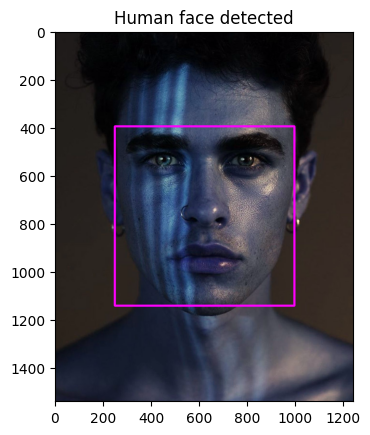

In [ ]:
n=random.randint(0, len(images_dataset))
test_img = images_dataset[n]

patch_coord_list = detect_faces_in_boundingBox(test_img)
print("bounding box coordinate coordinates:",patch_coord_list)

Il modello è stato otimizzato nel riconoscimento di un volto umano all'interno di una immagine ma necessita di ulteriori sviluppi per quanto riguarda l'utilizzo e la gestione di una patch.

Sviluppi futuri:
- movimentazione della patch per che scansiona al meglio l'immagine (allo stato attuale è ottimizzata per riconoscere volti che si trovano al centro dell'immagine partendo dall'ipotesi che in un selfie il volto sia centrato)
- aggiungere soglia per selezionare la migliore patch in cui è stato riconosciuto un volto
- constatare quindi se ci sono più volti

